# Titanic

We will predict if a passenger survived the Titanic incident or not.

1. **Data:** I will be using Age,Pclass,Sex,Sibsp,Parch and Fare(only in some cases) as data
2. **Label:** Survived will be the label

There are 3 csv files:<br>
- train.csv: The training dataset with both data and corresponding label<br>
- test.csv: The test dataset with data only<br>
- gender_submission.csv: This dataset contains whether the passenger survived or not ie. the label</list>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Import dataset

In [63]:
path_train='../msit_ml_classwork/MSIT_ML_CLASS/datasets/titanic/train.csv'
path_test='../msit_ml_classwork/MSIT_ML_CLASS/datasets/titanic/test.csv'
path_res='../msit_ml_classwork/MSIT_ML_CLASS/datasets/titanic/gender_submission.csv'

In [64]:
titanic=pd.read_csv(path_train)
testset=pd.read_csv(path_test)
results=pd.read_csv(path_res)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.shape

(891, 12)

### Dropping cabin

 I am dropping cabin because it has a lot of NULL values.<br>
 Since it is not useful in any way nor its null values can be replaced, it is not a useful piece of data

In [7]:
titanic=titanic.drop(['Cabin'],axis=1)

In [8]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


# Names

Age is a crucial piece of data.<br>
It has a significant amount of null values. <br>
<br><br>
I'll be removing the null values using either of the following methods:<br>
1. Using Imputer()
2. Separating salutation from the name and finding mean age for each salutation. Then this mean value will be assigned to the rows having NaN values.

In [9]:
titanic[titanic['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [10]:
name=list(titanic['Name'])

In [11]:
salut=[i.split(',')[-1].split('.')[0][1:] for i in name]

In [117]:
name=list(testset['Name'])

In [118]:
salut_test=[i.split(',')[-1].split('.')[0][1:] for i in name]

# Create data and label DataFrames

I am separating data and labels into titanic_knn_X and titanic_knn_y

In [12]:
titanic_knn_X=titanic.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
titanic_knn_y=titanic['Survived']

In [13]:
titanic_knn_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


# KNN (Train split)

KNeighbors method is being applied to get the score

In [14]:
titanic_knn_X=pd.get_dummies(titanic_knn_X)

In [15]:
titanic_knn_X=titanic_knn_X.drop(['Sex_male','Embarked_S'],axis=1)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer 
import matplotlib.pyplot as plt
%matplotlib inline

scale=StandardScaler()
imp=Imputer(missing_values = "NaN", strategy = "mean",axis=0)


In [17]:


X_train,X_test,y_train,y_test=train_test_split(titanic_knn_X,titanic_knn_y,test_size=0.125,random_state=29)

score_list=[]

In [18]:
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors = i)
    steps=[('imp',imp),
       ('scale',scale),
      ('clf',knn)]
    pipeline=Pipeline(steps)
    pipeline.fit(X_train,y_train)
    score_list.append(pipeline.score(X_test,y_test))
print(max(score_list))

0.8392857142857143


In [19]:
score_list

[0.7678571428571429,
 0.7857142857142857,
 0.7946428571428571,
 0.7857142857142857,
 0.7678571428571429,
 0.7678571428571429,
 0.7857142857142857,
 0.7767857142857143,
 0.7857142857142857,
 0.8035714285714286,
 0.7946428571428571,
 0.8035714285714286,
 0.8125,
 0.8214285714285714,
 0.8125,
 0.8392857142857143,
 0.8125,
 0.8125,
 0.8035714285714286]

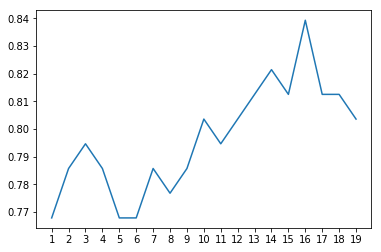

In [20]:
plt.xticks(range(1,20))
plt.plot(np.arange(1,20),score_list)

# Linear Regression (Train split)

In [21]:
from sklearn.linear_model import LinearRegression

lin=LinearRegression()

pipeline=Pipeline([('imp',imp),('scale',scale),('linreg',lin)])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.39447063670355087

# Logistic Regression(Train split)

In [22]:
from sklearn.linear_model import LogisticRegression

lrg=LogisticRegression()
pipeline=Pipeline([('imp',imp),('scale',scale),('logreg',lrg)])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.7767857142857143

# Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(random_state=29,max_depth=60,criterion='gini')
imp=Imputer(missing_values = "NaN", strategy = "most_frequent",axis=0)


pipeline=Pipeline([('imp',imp),('scale',scale),('clf',dtree)])

pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)
                

0.7767857142857143

In [24]:
imp=Imputer(missing_values = "NaN", strategy = "mean",axis=0)


pipeline=Pipeline([('imp',imp),('scale',scale),('clf',dtree)])

pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.7678571428571429

In [25]:
imp=Imputer(missing_values = "NaN", strategy = "median",axis=0)


pipeline=Pipeline([('imp',imp),('scale',scale),('clf',dtree)])

pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.75

## Importing XGBoost

In [26]:
import xgboost as xgb

# Creating data and labels for method-2 for replacing NaN values in Age

I created two lists: **salut** and **salut_test** which contain the salutations from the names.<br>
In the training and testing datasets, I'm adding a new column **'Salut'**

In [158]:

titanic['Salut']=salut
testset['Salut']=salut_test

In [159]:
titanic.groupby('Salut')['Age'].mean()

Salut
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [165]:
salut_mean_dict=titanic.groupby('Salut')['Age'].mean().to_dict()
salut_dict_test=testset.groupby('Salut')['Age'].mean().to_dict()
salut_dict_test['Ms']=21.7
salut_dict_test

{'Col': 50.0,
 'Dona': 39.0,
 'Dr': 53.0,
 'Master': 7.406470588235294,
 'Miss': 21.774843749999995,
 'Mr': 32.0,
 'Mrs': 38.903225806451616,
 'Ms': 21.7,
 'Rev': 35.5}

Replacing NaN values with mean age for each salutation

In [166]:
titanic['Age']=titanic.apply(lambda row: salut_mean_dict[row['Salut']] if np.isnan(row['Age']) else row['Age'],axis=1 )
testset['Age']=testset.apply(lambda row: salut_dict_test[row['Salut']] if np.isnan(row['Age']) else row['Age'],axis=1 )

In [167]:
titanic=titanic.drop('Salut',axis=1)
titanic_X=titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin','Fare'],axis=1)
titanic_y=titanic['Survived']
titanic_X=pd.get_dummies(titanic_X)
titanic_X=titanic_X.drop(['Sex_male','Embarked_S'],axis=1)
testset=testset.drop('Salut',axis=1)
testset_X=testset.drop(['PassengerId','Name','Ticket','Cabin','Fare'],axis=1)
testset_y=results['Survived']
testset_X=pd.get_dummies(testset_X)
testset_X=testset_X.drop(['Sex_male','Embarked_S'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(titanic_X,titanic_y,test_size=0.125,random_state=29)

In [168]:
titanic_X.head(20)

,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q
0,3,22.000000,1,0,0,0,0
1,1,38.000000,1,0,1,1,0
2,3,26.000000,0,0,1,0,0
3,1,35.000000,1,0,1,0,0
4,3,35.000000,0,0,0,0,0
5,3,32.368090,0,0,0,0,1
6,1,54.000000,0,0,0,0,0
7,3,2.000000,3,1,0,0,0
8,3,27.000000,0,2,1,0,0
9,2,14.000000,1,0,1,1,0


# XGBoost Classifier

### Train split

In [169]:
score2=[]

xg_clf=xgb.XGBClassifier(objective='reg:logistic',n_estimators=8,seed=29,max_depth= 90)
xg_clf.fit(X_train,y_train)
predict=xg_clf.predict(X_test)
score2.append(float(np.sum(predict==y_test))/y_test.shape[0])



/home/alphrho/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [170]:
print('Maximum Accuracy(train split):',max(score2))


Maximum Accuracy(train split): 0.8482142857142857


### Final

In [293]:
score3=[]

xg_clf=xgb.XGBClassifier(objective='reg:logistic',n_estimators=19,seed=29,max_depth=50,gamma=0.1)
xg_clf.fit(titanic_X,titanic_y)
predict=xg_clf.predict(testset_X)
score3.append(float(np.sum(predict==testset_y))/testset_y.shape[0])


print('Maximum Accuracy(Final):',max(score3))


Maximum Accuracy(Final): 0.868421052631579


/home/alphrho/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# XGBoost with LabelEncoder and OneHotEncoder

### Linear Regression: Train split

In [173]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [174]:
le=LabelEncoder()

category_mask=(titanic_X.dtypes=='object')
category_columns=titanic_X.columns.tolist()

In [175]:
data_xgb=titanic_X
data_xgb[category_columns]=data_xgb[category_columns].apply(lambda x:le.fit_transform(x))
label_xgb=titanic_y

In [176]:
steps=[
    ('ohe',OneHotEncoder(sparse=True,categorical_features=category_mask)),
    ('clf',LinearRegression())
]

pipeline=Pipeline(steps)

In [177]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(pipeline,X=data_xgb,y=label_xgb,cv=10)
print('Accuracy(XGBoost:le/ohe:LinReg):',accuracy)

Accuracy(XGBoost:le/ohe:LinReg): [0.41007607 0.1846625  0.32491526 0.3765508  0.37720626 0.39117981
 0.38372721 0.31253969 0.50917817 0.39857115]


### Final

In [239]:
category_mask=(testset_X.dtypes=='object')
category_columns=testset_X.columns.tolist()

data_xgb=testset_X
data_xgb[category_columns]=data_xgb[category_columns].apply(lambda x:le.fit_transform(x))
label_xgb=testset_y

In [240]:
steps=[
    ('ohe',OneHotEncoder(sparse=True,categorical_features=category_mask)),
    ('clf',LinearRegression())
]

pipeline=Pipeline(steps)
pipeline.fit(titanic_X,titanic_y)
pipeline.score(testset_X,testset_y)

0.6751553931185106

### Logistic Regression

In [178]:
steps=[
    ('ohe',OneHotEncoder(sparse=True,categorical_features=category_mask)),
    ('clf',LogisticRegression())
]

pipeline=Pipeline(steps)

accuracy=cross_val_score(pipeline,X=data_xgb,y=label_xgb,cv=20)
print('Accuracy(XGBoost:le/ohe:LinReg):',accuracy)

Accuracy(XGBoost:le/ohe:LinReg): [0.76086957 0.82608696 0.75555556 0.8        0.77777778 0.77777778
 0.82222222 0.84444444 0.82222222 0.81818182 0.79545455 0.79545455
 0.70454545 0.86363636 0.79545455 0.81818182 0.81818182 0.81818182
 0.81818182 0.84090909]


# Random forests

### Train split

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:

r_clf=RandomForestClassifier(n_estimators=73,max_depth=80,random_state=29)
r_clf.fit(X_train,y_train)
r_clf.score(X_test,y_test)


0.7946428571428571

In [181]:

r_clf=RandomForestClassifier(n_estimators=8,max_depth=90,random_state=29,criterion='entropy' )
r_clf.fit(X_train,y_train)
r_clf.score(X_test,y_test)


0.7589285714285714

In [182]:

r_clf=RandomForestClassifier(n_estimators=112,max_depth=80,random_state=29,min_samples_split=0.1 )
r_clf.fit(X_train,y_train)
r_clf.score(X_test,y_test)


0.8571428571428571

In [183]:

r_clf=RandomForestClassifier(n_estimators=10,max_depth=90,random_state=29,criterion='entropy',min_samples_split=0.133)
r_clf.fit(X_train,y_train)
r_clf.score(X_test,y_test)


0.8035714285714286

### Final

In [194]:
r_clf=RandomForestClassifier(n_estimators=90,max_depth=70,random_state=29)
r_clf.fit(titanic_X,titanic_y)
r_clf.score(testset_X,testset_y)


0.84688995215311

In [212]:
r_clf=RandomForestClassifier(n_estimators=112,max_depth=80,random_state=29,min_samples_split=0.1 )
r_clf.fit(titanic_X,titanic_y)
r_clf.score(testset_X,testset_y)


0.9473684210526315

In [188]:
r_clf=RandomForestClassifier(n_estimators=10,max_depth=90,random_state=29,criterion='entropy',min_samples_split=0.133)
r_clf.fit(titanic_X,titanic_y)
r_clf.score(testset_X,testset_y)

0.9282296650717703

In [205]:
r_clf=RandomForestClassifier(n_estimators=50,max_depth=90,random_state=29,criterion='entropy' )
r_clf.fit(titanic_X,titanic_y)
r_clf.score(testset_X,testset_y)


0.8492822966507177

# GridSearchCV

In [214]:
from sklearn.model_selection import GridSearchCV

In [316]:
step_gscv=[
    ('ohe',OneHotEncoder(sparse=True,categorical_features=category_mask)),
    ('clf',xgb.XGBRegressor())
]

clf_param_grid={
    'clf__max_depth':[80,90,100],
    'clf__learning_rate':[0.052]
}

gscv_clf=Pipeline(step_gscv)
estimator=GridSearchCV(gscv_clf,param_grid=clf_param_grid,cv=5,verbose=1,scoring='neg_mean_squared_error')
estimator.fit(titanic_X,titanic_y)
print('score: ',np.sqrt(-1*estimator.score(testset_X,testset_y)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
score:  0.43153642378623713


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.0s finished


# Support Vector Machines

In [106]:
from sklearn import svm

### Train split

kernel='poly' didn't yield a result. I had to restart the kernel:(

In [109]:
X_train,X_test,y_train,y_test=train_test_split(titanic_X,titanic_y,test_size=0.125,random_state=29)

In [110]:
svm_clf=svm.SVC()
pipeline=Pipeline([('imp',imp),('scale',scale),('clf',svm_clf)])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.8125

In [111]:
svm_clf=svm.SVC()

svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.7946428571428571

In [112]:
svm_clf=svm.SVC(kernel='linear',random_state=29)

svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.8125

In [113]:
# svm_clf=svm.SVC(kernel='poly',random_state=29)

# svm_clf.fit(X_train,y_train)
# svm_clf.score(X_test,y_test)

In [114]:
svm_clf=svm.SVC(kernel='rbf',C=1e9,random_state=29)

svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.7946428571428571

In [115]:
svm_clf=svm.SVC(kernel='sigmoid',C=1e20,random_state=29)

svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.6071428571428571

In [116]:
svm_clf=svm.SVC(kernel='rbf',random_state=29)
pipeline=Pipeline([('imp',imp),('scale',scale),('clf',svm_clf)])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.8125

### Final

In [216]:
svm_clf=svm.SVC()

svm_clf.fit(titanic_X,titanic_y)
svm_clf.score(testset_X,testset_y)

0.8253588516746412

In [238]:
svm_clf=svm.SVC(kernel='linear',random_state=29)

svm_clf.fit(titanic_X,titanic_y)
svm_clf.score(testset_X,testset_y)

1.0

In [218]:
svm_clf=svm.SVC(kernel='rbf',random_state=29)

svm_clf.fit(titanic_X,titanic_y)
svm_clf.score(testset_X,testset_y)

0.8253588516746412

In [219]:
svm_clf=svm.SVC(kernel='sigmoid')

svm_clf.fit(titanic_X,titanic_y)
svm_clf.score(testset_X,testset_y)

0.6363636363636364

In [236]:
svm_clf=svm.SVC(kernel='rbf',random_state=29,gamma=0.062)

svm_clf.fit(titanic_X,titanic_y)
svm_clf.score(testset_X,testset_y)

0.8325358851674641

# Conclusions

By applying Random Forest classifier, I obtained max. score of **94.7%**<br>
Most scores are in range of 80-90%.<br>
Despite tuning, more accuracy could not be achieved